In [1]:
! pip install pydataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [59]:
from pydataset import data

# Load the "Air Passengers" dataset
df = data('AirPassengers')

# Display the first few rows of the dataset
print(df.head())
print(df.tail())

          time  AirPassengers
1  1949.000000            112
2  1949.083333            118
3  1949.166667            132
4  1949.250000            129
5  1949.333333            121
            time  AirPassengers
140  1960.583333            606
141  1960.666667            508
142  1960.750000            461
143  1960.833333            390
144  1960.916667            432


In [25]:
df.shape

(144, 2)

In [29]:
# Extract year and month components
df['year'] = df['time'].astype(int)
df['month'] = ((df['time'] - df['year']) * 12).astype(int) + 1

# Calculate the day component based on the fractional part of the "time" column
df['day'] = ((df['time'] - df['year'] - (df['month'] - 1) / 12) * 365).astype(int) + 1

# Create a list of the number of days in each month
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Adjust day values to be within the valid range for each month
df['day'] = df.apply(lambda row: min(row['day'], days_in_month[int(row['month']) - 1]), axis=1)

# Convert to datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Display the updated DataFrame
print(df)

            time  AirPassengers  year  month   day       date
1    1949.000000            112  1949      1   1.0 1949-01-01
2    1949.083333            118  1949      1  31.0 1949-01-31
3    1949.166667            132  1949      3   1.0 1949-03-01
4    1949.250000            129  1949      4   1.0 1949-04-01
5    1949.333333            121  1949      4  30.0 1949-04-30
6    1949.416667            135  1949      6   1.0 1949-06-01
7    1949.500000            148  1949      7   1.0 1949-07-01
8    1949.583333            148  1949      7  31.0 1949-07-31
9    1949.666667            136  1949      9   1.0 1949-09-01
10   1949.750000            119  1949     10   1.0 1949-10-01
11   1949.833333            104  1949     10  31.0 1949-10-31
12   1949.916667            118  1949     12   1.0 1949-12-01
13   1950.000000            115  1950      1   1.0 1950-01-01
14   1950.083333            126  1950      1  31.0 1950-01-31
15   1950.166667            141  1950      3   1.0 1950-03-01
16   195

In [30]:
air_passenger = df [['date','AirPassengers']]

In [31]:
air_passenger.head()

,date,AirPassengers
1,1949-01-01,112
2,1949-01-31,118
3,1949-03-01,132
4,1949-04-01,129
5,1949-04-30,121


In [36]:
# Convert the 'date' column to the index
air_passenger.set_index('date', inplace=True)
air_passenger.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AirPassengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [37]:
air_passenger.head()

,AirPassengers
date,
1949-01-01,112
1949-01-31,118
1949-03-01,132
1949-04-01,129
1949-04-30,121


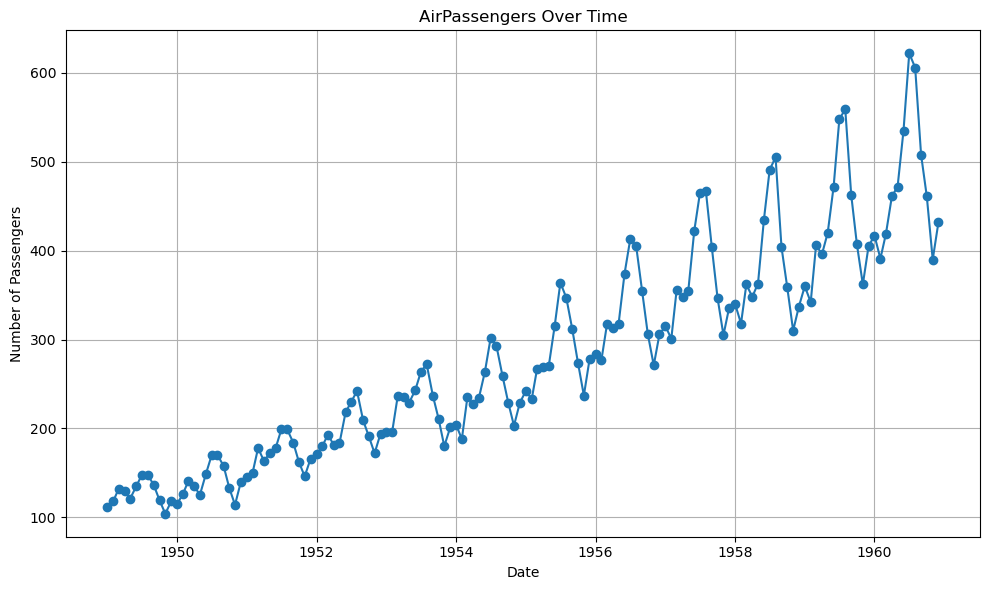

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(air_passenger.index, air_passenger['AirPassengers'], marker='o', linestyle='-')
plt.title('AirPassengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

The first check is to check the stationarity of the data , i.e the data should have constant mean and constant variance.
    Over the period of time the mean of data should not change much
    and the variance should also be uniform.

Lets us learn this by example :
We will learn the concept of moving average from the above data.This will lead to smoothning of the time series data.

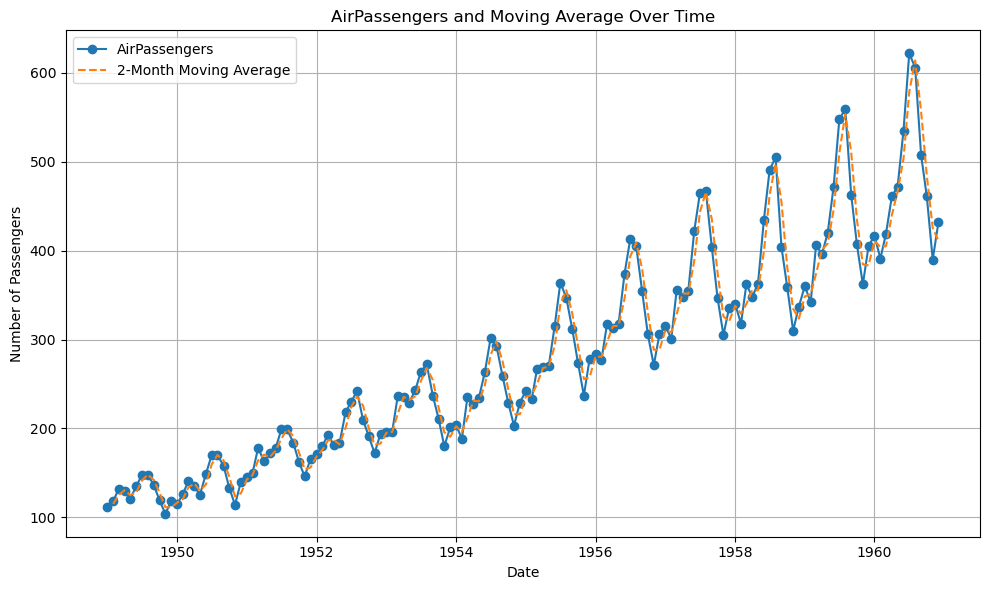

In [40]:
# Calculate the 2-month moving average
moving_avg = air_passenger['AirPassengers'].rolling(window=2).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(air_passenger.index, air_passenger['AirPassengers'], marker='o', linestyle='-', label='AirPassengers')
plt.plot(air_passenger.index, moving_avg, linestyle='--', label='2-Month Moving Average')
plt.title('AirPassengers and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
moving_avg.head()

date
1949-01-01      NaN
1949-01-31    115.0
1949-03-01    125.0
1949-04-01    130.5
1949-04-30    125.0
Name: AirPassengers, dtype: float64

In [58]:
air_passenger.tail()

,AirPassengers,Forecast,Level,Trend
date,,,,
1960-08-01,606,571.681560,528.003442,14.559373
1960-09-01,508,575.180832,535.650251,13.176860
1960-10-01,461,560.253016,531.261689,9.663776
1960-11-01,390,521.620643,510.740372,3.626757
1960-12-01,432,498.889919,497.893703,0.332072


as we can see the moving avaerage when we take window as 2 it will omit the first month in calculation and the average starts from 
second month : the average and T2 i.e on 1949-01-31 it is 118+112/2 

### This is one of the technique to make the time series stationary , this also helps in making prediction.

Lets make the changes to window value to 10 and see how graph looks like...

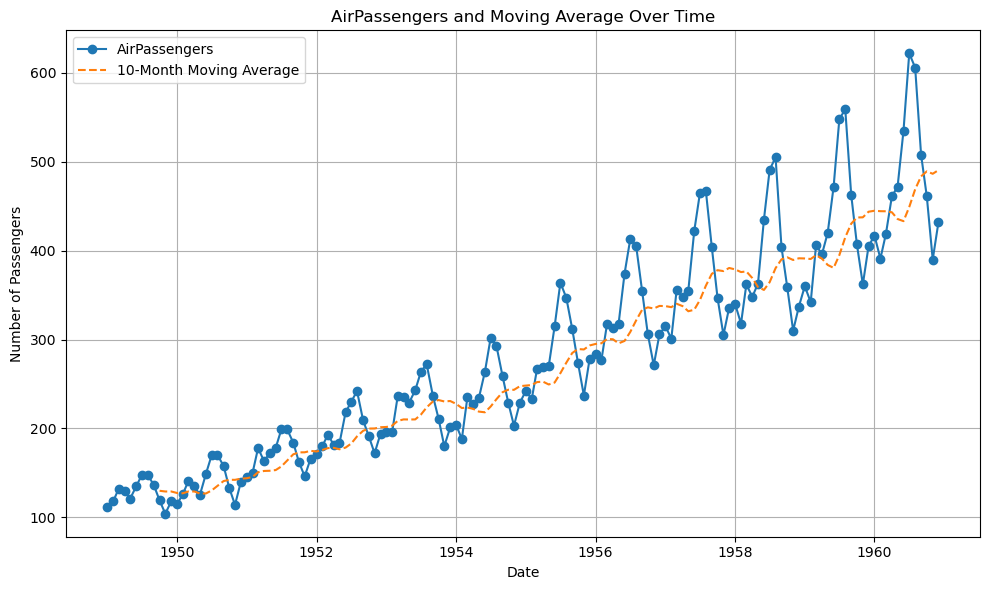

In [45]:
# Calculate the 10-month moving average
moving_avg = air_passenger['AirPassengers'].rolling(window=10).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(air_passenger.index, air_passenger['AirPassengers'], marker='o', linestyle='-', label='AirPassengers')
plt.plot(air_passenger.index, moving_avg, linestyle='--', label='10-Month Moving Average')
plt.title('AirPassengers and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Time series can be decomposed into - 
   #### 1. Trend (T)
   #### 2. Seasonality (S)
   #### 3. Irregularity (I)
    

### Lets understand additive and multipliactive time series

#### In additive time series is additon of T + S + I
#### In multiplative time series it is T * S * I

## Exponential Time Series

As we checked the moving average , we take a particular window for making the average , but what if we want to give more weighatge to the recent observation 
and lesser weightange to the previous observation.
And also i dont want to omit previous observation to get better trend.
For this we can use exponential smoothening 
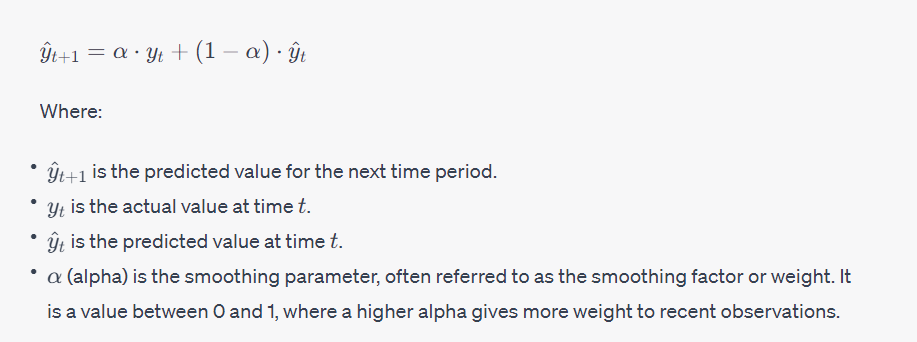

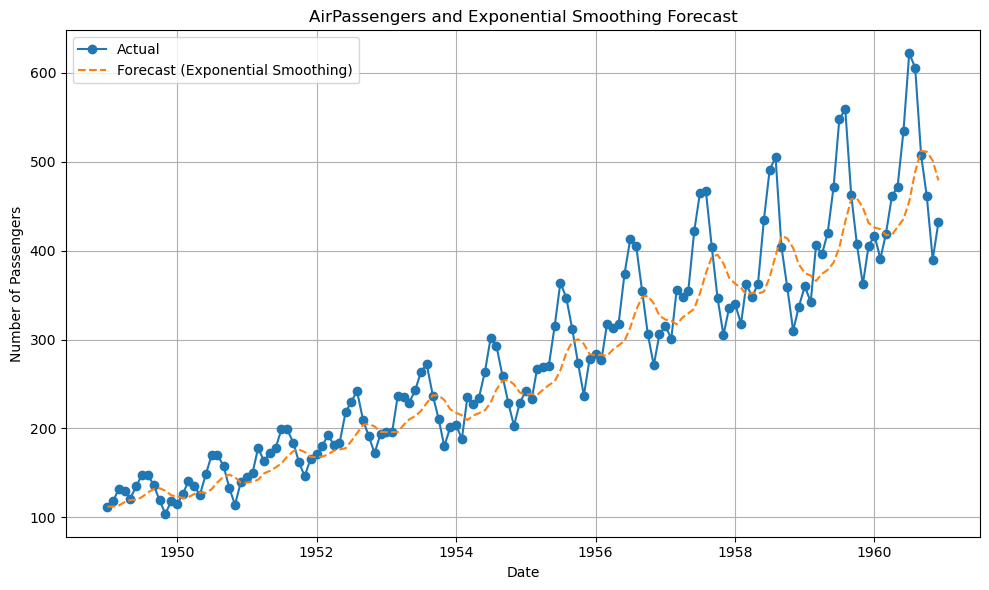

In [52]:
# Smoothing parameter (alpha)
alpha = 0.2

# Initialize the first forecast as the first actual value
air_passenger['Forecast'] = air_passenger['AirPassengers'][0]


# Explicitly specify the data type of the 'Forecast' column as float
air_passenger['Forecast'] = air_passenger['Forecast'].astype(float)

# Calculate the forecast using exponential smoothing
for i in range(1, len(air_passenger)):
    air_passenger['Forecast'][i] = alpha * air_passenger['AirPassengers'][i-1] + (1 - alpha) * air_passenger['Forecast'][i-1]

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(air_passenger.index, air_passenger['AirPassengers'], marker='o', linestyle='-', label='Actual')
plt.plot(air_passenger.index, air_passenger['Forecast'], linestyle='--', label='Forecast (Exponential Smoothing)')
plt.title('AirPassengers and Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

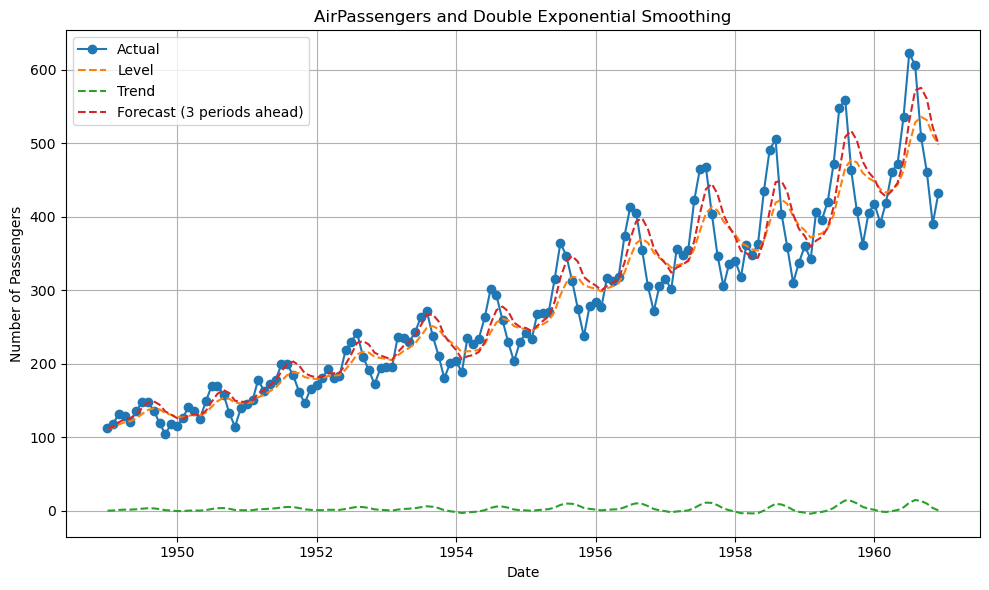

In [54]:
# Smoothing parameters
alpha = 0.2  # Smoothing parameter for level
beta = 0.2   # Smoothing parameter for trend

# Initialize level and trend
air_passenger['Level'] = air_passenger['AirPassengers'][0]
air_passenger['Trend'] = 0

# Calculate level and trend using double exponential smoothing
for i in range(1, len(air_passenger)):
    actual = air_passenger.at[air_passenger.index[i], 'AirPassengers']
    previous_level = air_passenger.at[air_passenger.index[i-1], 'Level']
    previous_trend = air_passenger.at[air_passenger.index[i-1], 'Trend']
    
    # Update level
    air_passenger.at[air_passenger.index[i], 'Level'] = alpha * actual + (1 - alpha) * (previous_level + previous_trend)
    
    # Update trend
    air_passenger.at[air_passenger.index[i], 'Trend'] = beta * (air_passenger.at[air_passenger.index[i], 'Level'] - previous_level) + (1 - beta) * previous_trend

# Calculate forecasts
k = 3  # Number of periods ahead for forecasting
air_passenger['Forecast'] = air_passenger['Level'] + k * air_passenger['Trend']

# Plot the original data, level, trend, and forecast
plt.figure(figsize=(10, 6))
plt.plot(air_passenger.index, air_passenger['AirPassengers'], marker='o', linestyle='-', label='Actual')
plt.plot(air_passenger.index, air_passenger['Level'], linestyle='--', label='Level')
plt.plot(air_passenger.index, air_passenger['Trend'], linestyle='--', label='Trend')
plt.plot(air_passenger.index, air_passenger['Forecast'], linestyle='--', label=f'Forecast ({k} periods ahead)')
plt.title('AirPassengers and Double Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
# Display the DataFrame with forecasts
air_passenger[['AirPassengers', 'Level', 'Trend', 'Forecast']]

,AirPassengers,Level,Trend,Forecast
date,,,,
1949-01-01,112,112.000000,0.000000,112.000000
1949-01-31,118,113.200000,0.240000,113.920000
1949-03-01,132,117.152000,0.982400,120.099200
1949-04-01,129,120.307520,1.417024,124.558592
1949-04-30,121,121.579635,1.388042,125.743762
1949-06-01,135,125.374142,1.869335,130.982147
1949-07-01,148,131.394782,2.699596,139.493570
1949-07-31,148,136.875502,3.255821,146.642965
1949-09-01,136,139.305059,3.090568,148.576763


In [127]:
final_df = air_passenger[['AirPassengers']]

In [61]:
## Lets perform decomposition of time series and also do stationarity check
import statsmodels.api as sm

In this code:


We use seasonal_decompose to decompose the time series into its components (trend, seasonal, and residual).
We plot the original time series along with its components for visualization.
The resulting plots will show the original time series and its decomposed components. You can adjust the decomposition model (additive or multiplicative) and customize the plots as needed.


 ### The "residual" refers to the component of a time series that cannot be explained by the trend or seasonal components. It represents the random or irregular fluctuations in the data that are left after removing the predictable patterns due to trend and seasonality.

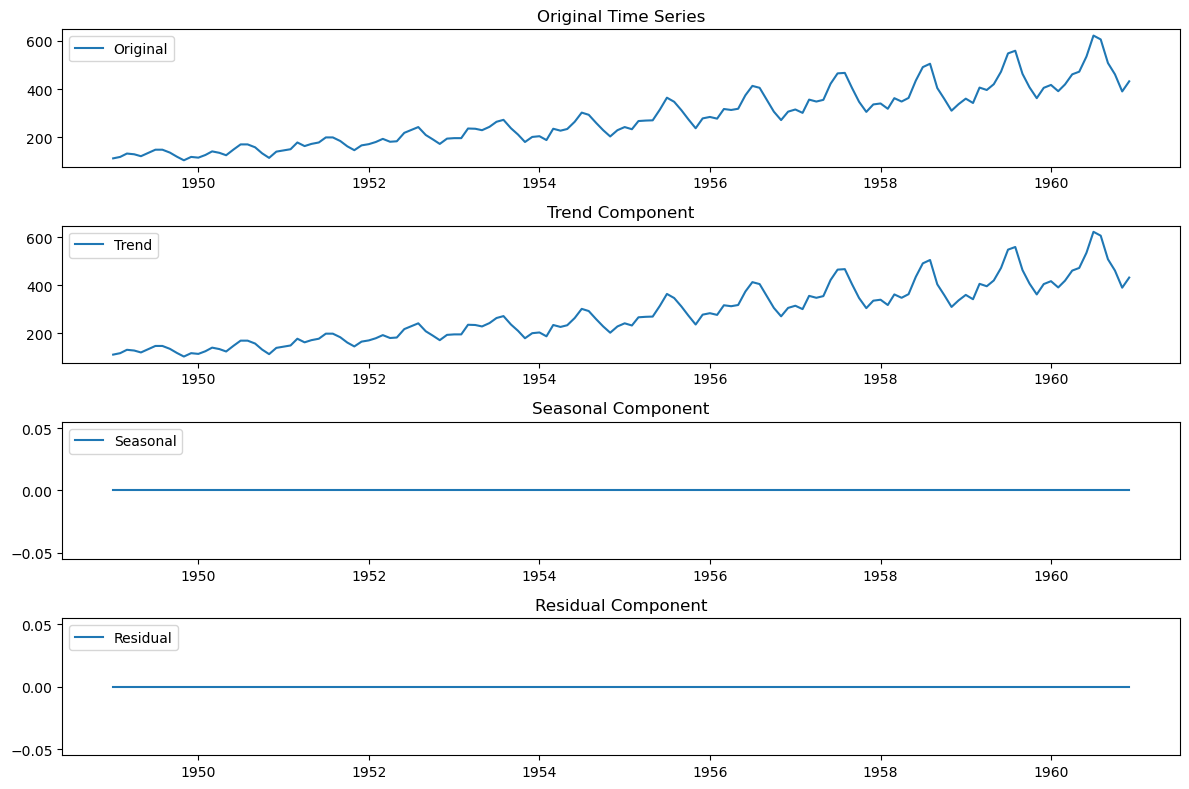

In [63]:
# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(air_passenger['AirPassengers'], model='additive',period =1)

# Plot the original time series and its components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(air_passenger['AirPassengers'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()

# Show the plots
plt.show()

## A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time.
## Non-stationary time series, on the other hand, exhibit trends, seasonality, or other patterns that evolve over time.

Null Hypothesis (H0): The null hypothesis assumes that the time series is non-stationary. In other words, it posits that the time series exhibits one or more of the following non-stationary characteristics:

The mean of the series is not constant over time (it has a trend).
The variance of the series is not constant over time (it exhibits heteroscedasticity).
The autocorrelation (correlation with past values) is not constant over time (it exhibits seasonality or dependence on past values).
Alternative Hypothesis (H1): The alternative hypothesis contradicts the null hypothesis. It assumes that the time series is stationary, which means it has the following characteristics:

The mean of the series is constant over time (no trend).
The variance of the series is constant over time (homoscedasticity).
The autocorrelation is constant over time (no seasonality or dependence on past values).

In [64]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(air_passenger['AirPassengers'])

# Extract and print the ADF statistic and p-value
adf_statistic, p_value, _, _, _, _ = result
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Check for stationarity based on p-value and a significance level (e.g., 0.05)
if p_value <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
The time series is non-stationary.


In [74]:
stationary_data = {
    'Stationary Data': [0.2, -0.1, 0.3, -0.2, 0.1, -0.3, 0.4, -0.2, 0.3, 0.1, 0.2, -0.1, 0.3, -0.2, 0.1, -0.3, 0.4, -0.2, 0.3, 0.1]
}

df_stationary = pd.DataFrame(stationary_data)

In [78]:
df_stationary.head()

,Stationary Data
0,0.2
1,-0.1
2,0.3
3,-0.2
4,0.1


In [76]:
non_stationary_data = {
    'Non-Stationary Data': [1.0, 1.2, 1.4, 1.7, 2.0, 2.3, 2.7, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0]
}

df_non_stationary = pd.DataFrame(non_stationary_data)
df_non_stationary.head()

,Non-Stationary Data
0,1.0
1,1.2
2,1.4
3,1.7
4,2.0


In [87]:
result_st_data = adfuller(df_stationary['Stationary Data'])

# Extract and print the ADF statistic and p-value
adf_statistic, p_value, _, _, _, _ = result_st_data
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Check for stationarity based on p-value and a significance level (e.g., 0.05)
if p_value <= 0.05:
    print('The time series is stationary.Reject the null hypothesis')
else:
    print('The time series is non-stationary.Failed to reject the null hypothesis')

ADF Statistic: -23574515188891.574
p-value: 0.0
The time series is stationary.Reject the null hypothesis


In [88]:
result__non_st_data = adfuller(df_non_stationary['Non-Stationary Data'])

# Extract and print the ADF statistic and p-value
adf_statistic, p_value, _, _, _, _ = result__non_st_data
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Check for stationarity based on p-value and a significance level (e.g., 0.05)
if p_value <= 0.05:
    print('The time series is stationary.Reject the null hypothesis')
else:
    print('The time series is non-stationary.Failed to reject the null hypothesis')

ADF Statistic: -0.1288787765437582
p-value: 0.9464850406435151
The time series is non-stationary.Failed to reject the null hypothesis


# Auto Regression 
## In time series analysis, autoregression, often abbreviated as AR, is a fundamental concept that refers to a model where a value in a time series is linearly dependent on its past values. 
## It's a statistical method used to describe and forecast a time series based on its own past values.

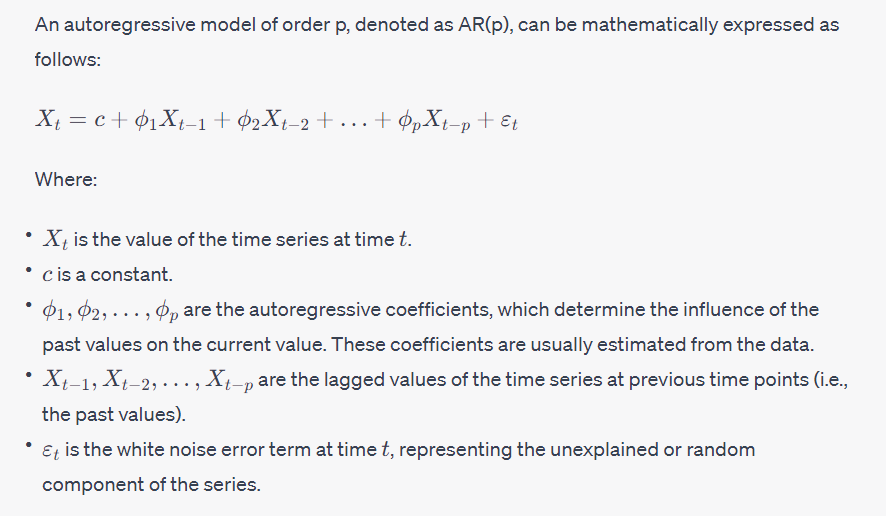

Key points about autoregressive models (AR models) in time series analysis:

Order (p): The order of the autoregressive model, denoted as p, determines how many lagged values are included in the model. For example, in an AR(1) model, only the immediately preceding value is considered.

Stationarity: Autoregressive models assume that the time series is stationary, meaning that its statistical properties do not change over time. If the series is not stationary, it may need to be differenced (using differencing techniques like ARIMA) before applying an AR model.

Parameter Estimation: The autoregressive coefficients (ϕ) are estimated from the data using statistical methods 
like maximum likelihood estimation (MLE) or least squares.

In [86]:
from statsmodels.tsa.stattools import acf,pacf

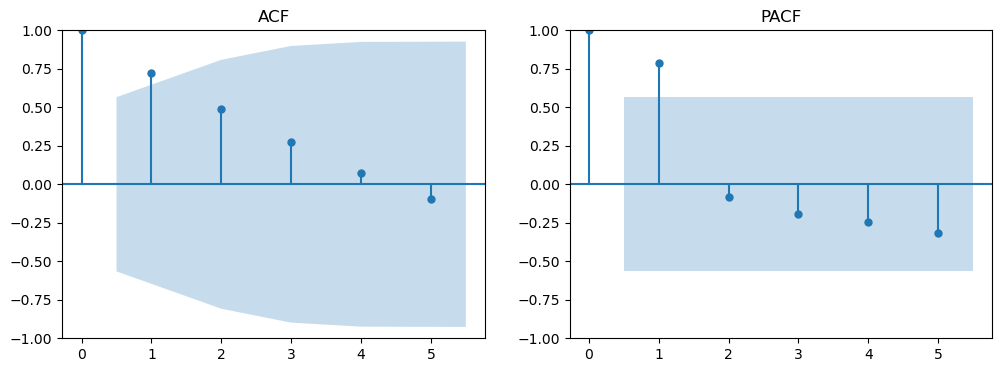

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a DataFrame with the sales data
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        'Sales': [100, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]}

df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

# Plot ACF and PACF
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(df['Sales'], lags=5, ax=plt.gca(), title='ACF')
plt.subplot(122)
plot_pacf(df['Sales'], lags=5, ax=plt.gca(), title='PACF')
plt.show()

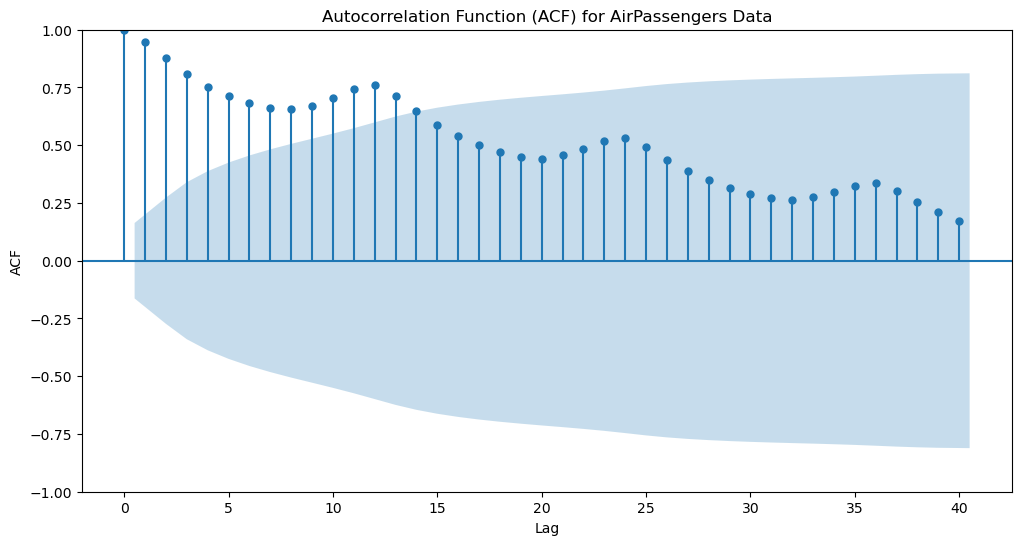

In [89]:
# Calculate and plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(air_passenger['AirPassengers'], lags=40, ax=plt.gca())  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF) for AirPassengers Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

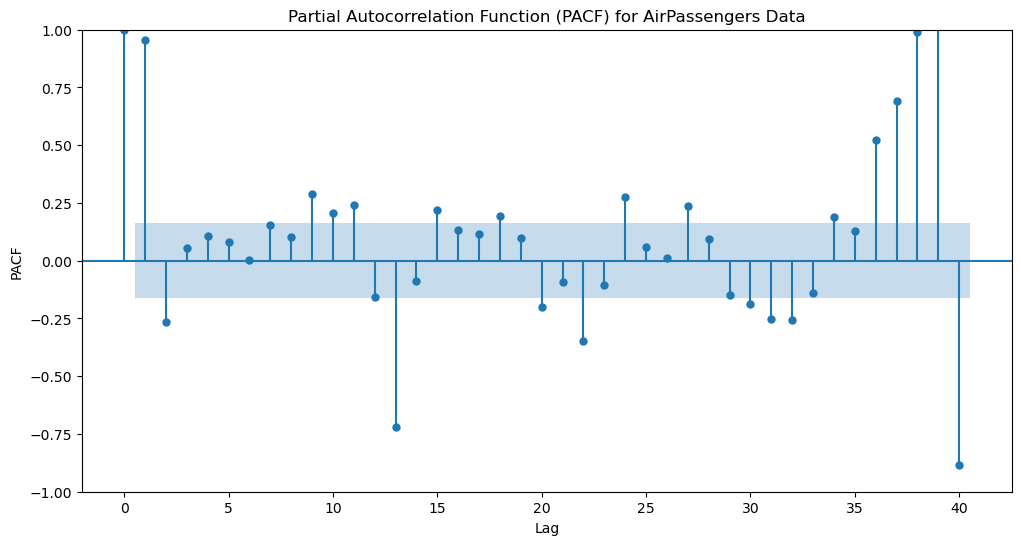

In [90]:
# Calculate and plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(air_passenger['AirPassengers'], lags=40, ax=plt.gca())  # Adjust 'lags' as needed
plt.title('Partial Autocorrelation Function (PACF) for AirPassengers Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Text(0.5, 1.0, 'Partial Autocorrelation Function')

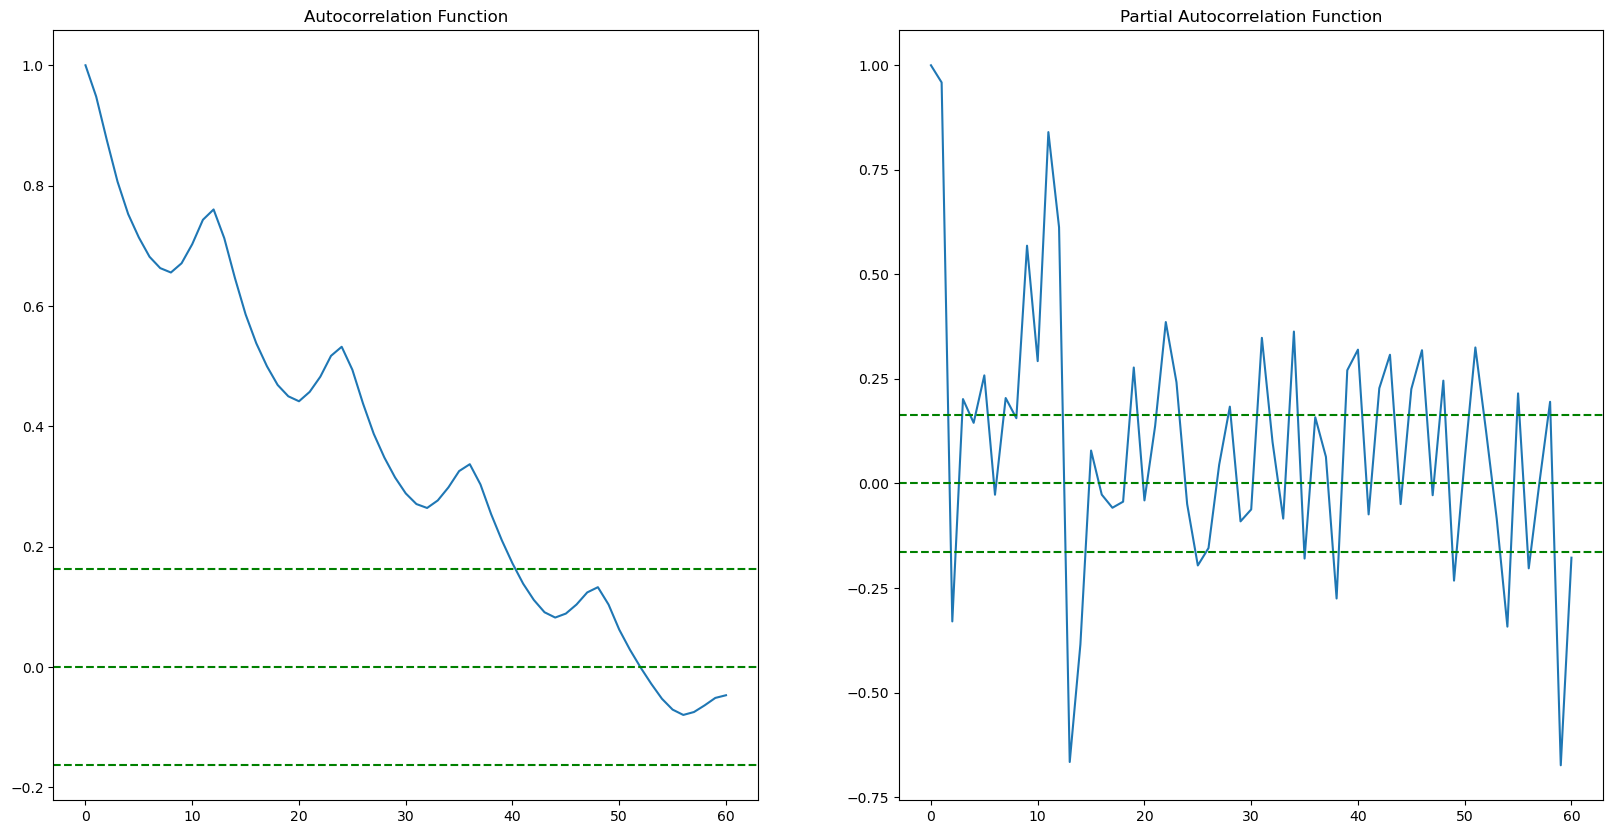

In [95]:
lag_acf=acf(air_passenger['AirPassengers'], nlags=60)
lag_pacf=pacf(air_passenger['AirPassengers'], nlags=60, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(air_passenger)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(air_passenger)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(air_passenger)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(air_passenger)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

In [97]:
# Check for stationarity using the ADF test
def check_stationarity(timeseries):
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original Data')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Perform ADF test
    adf_test = adfuller(timeseries['AirPassengers'], autolag='AIC')
    print('ADF Test Results:')
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print(f'Critical Values: {adf_test[4]}')

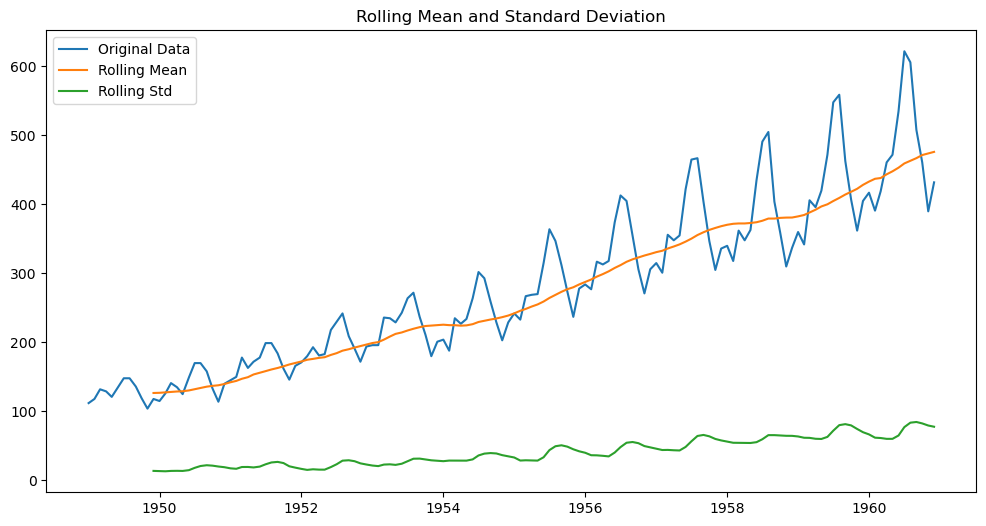

ADF Test Results:
ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [128]:
check_stationarity(final_df)

## Making Series Stationary 

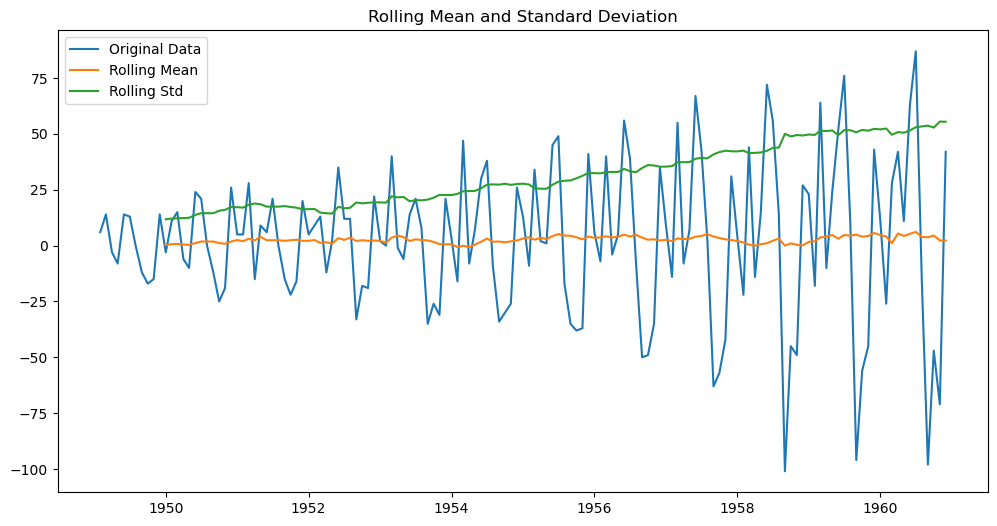

ADF Test Results:
ADF Statistic: -2.8292668241699994
p-value: 0.0542132902838255
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [129]:
# Differencing to achieve stationarity
data_diff = final_df - final_df.shift(1)
data_diff.dropna(inplace=True)
check_stationarity(data_diff)

In [130]:
data_diff.head()

,AirPassengers
date,
1949-01-31,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-04-30,-8.0
1949-06-01,14.0


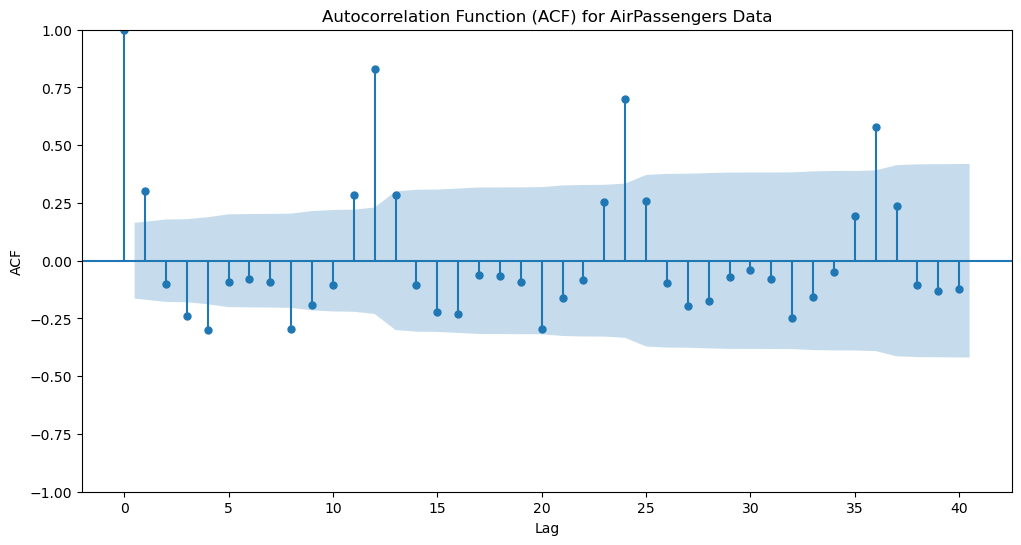

In [131]:
# Calculate and plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(data_diff['AirPassengers'], lags=40, ax=plt.gca())  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF) for AirPassengers Data')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

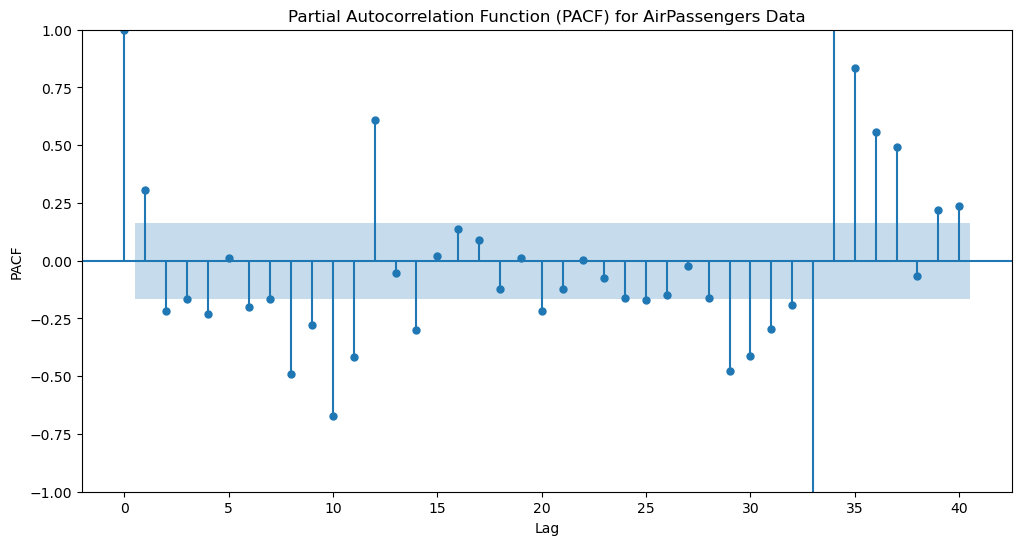

In [132]:
# Calculate and plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(data_diff['AirPassengers'], lags=40, ax=plt.gca())  # Adjust 'lags' as needed
plt.title('Partial Autocorrelation Function (PACF) for AirPassengers Data')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [111]:
from statsmodels.tsa.arima.model import ARIMA

In [147]:
# Use only the 'AirPassengers' column as the univariate time series
endog = data_diff['AirPassengers']

C:\Users\anupa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anupa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anupa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


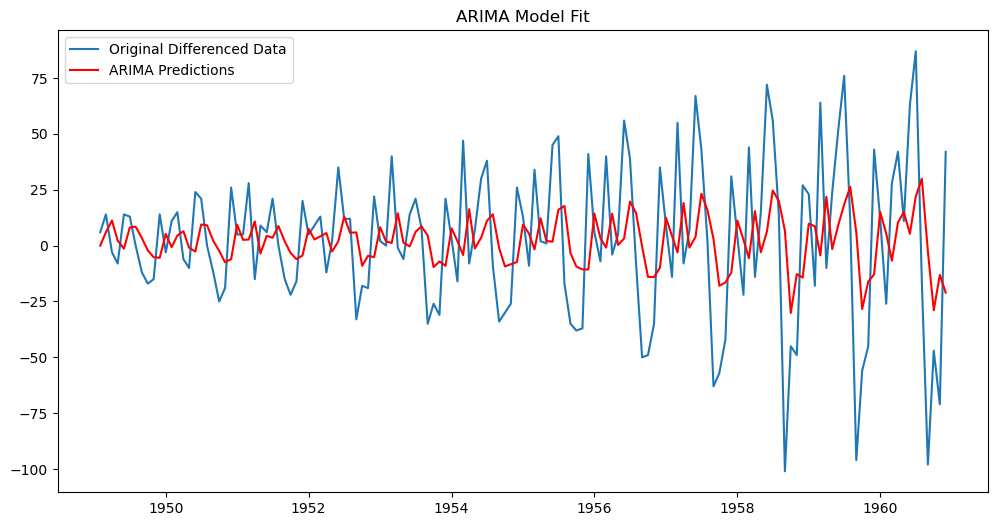

In [148]:
# Fit an ARIMA model
model = ARIMA(endog, order=(1, 1, 1))  # (p, d, q)
results = model.fit()

# Plot the predicted values
plt.figure(figsize=(12, 6))
plt.plot(endog, label='Original Differenced Data')
plt.plot(results.fittedvalues, color='red', label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Model Fit')
plt.show()

In [149]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

date
1949-01-31     0.000000
1949-03-01     5.996759
1949-04-01    11.248682
1949-04-30     2.286309
1949-06-01    -1.372535
dtype: float64


In [150]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

date
1949-01-31     0.000000
1949-03-01     5.996759
1949-04-01    17.245441
1949-04-30    19.531750
1949-06-01    18.159216
dtype: float64


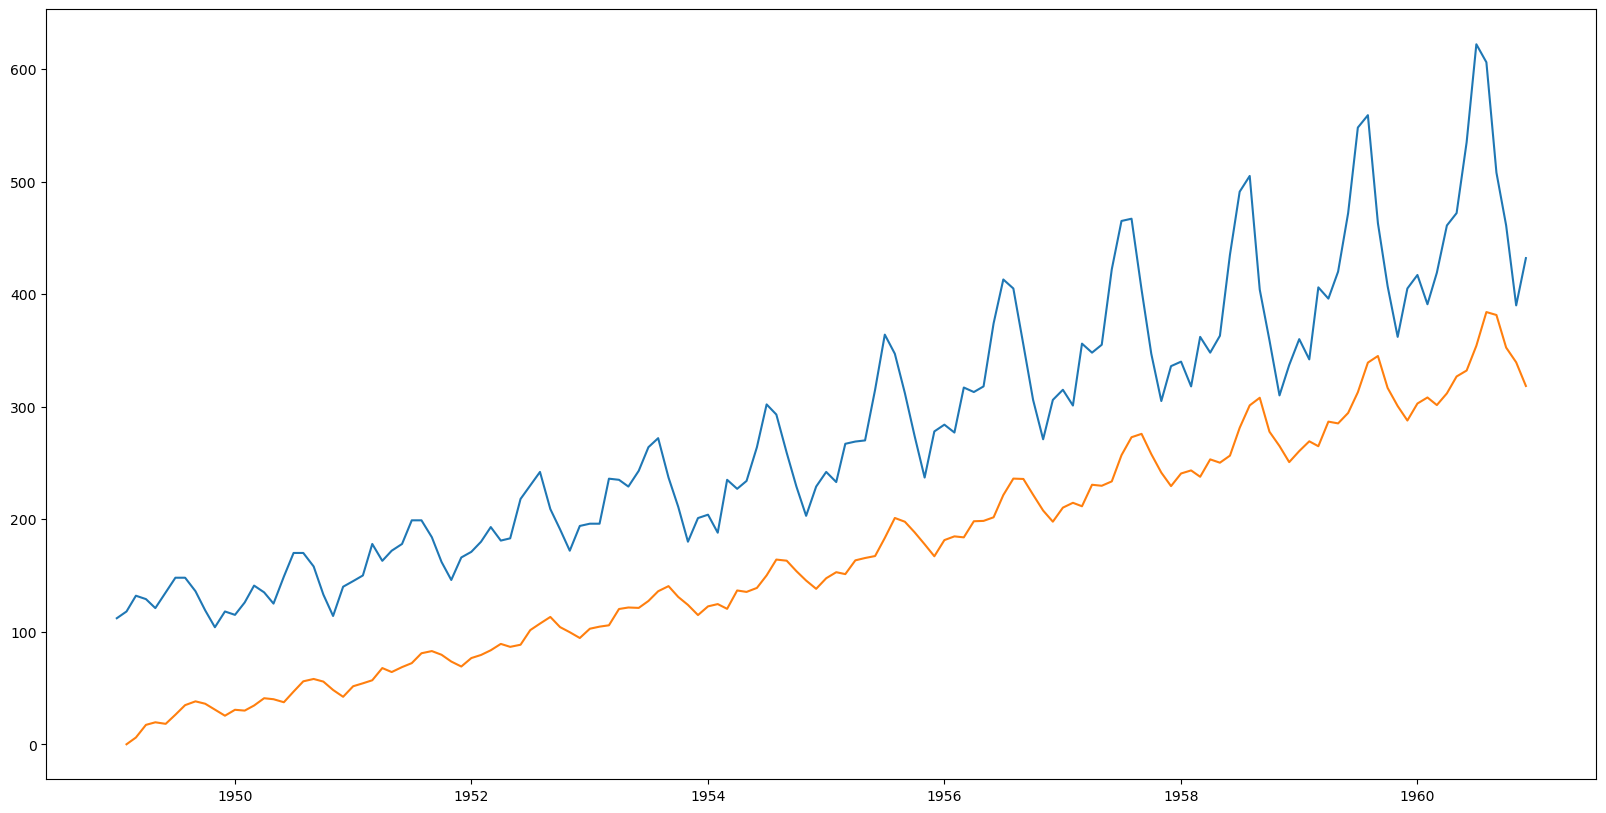

In [151]:
plt.figure(figsize=(20,10))
plt.plot(air_passenger['AirPassengers'])
plt.plot(predictions_cum_sum)